In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import imageio
from skimage import color
from skimage import io
from matplotlib.pyplot import imshow
%matplotlib inline

In [25]:
# Imagens Preprocessadas para branco e preto
imagensOriginais = os.listdir("./fotosPreProcessadas/")[:0:-1]
imagensOriginais

['img10.png',
 'img11.png',
 'img1.png',
 'img2.png',
 'img3.png',
 'img7.png',
 'img6.png',
 'img4.png',
 'img5.png',
 'img8.png',
 'img9.png']

In [26]:
img = imageio.imread("./fotosPreProcessadas/" + imagensOriginais[0])

## imagem Original

(-0.5, 876.5, 605.5, -0.5)

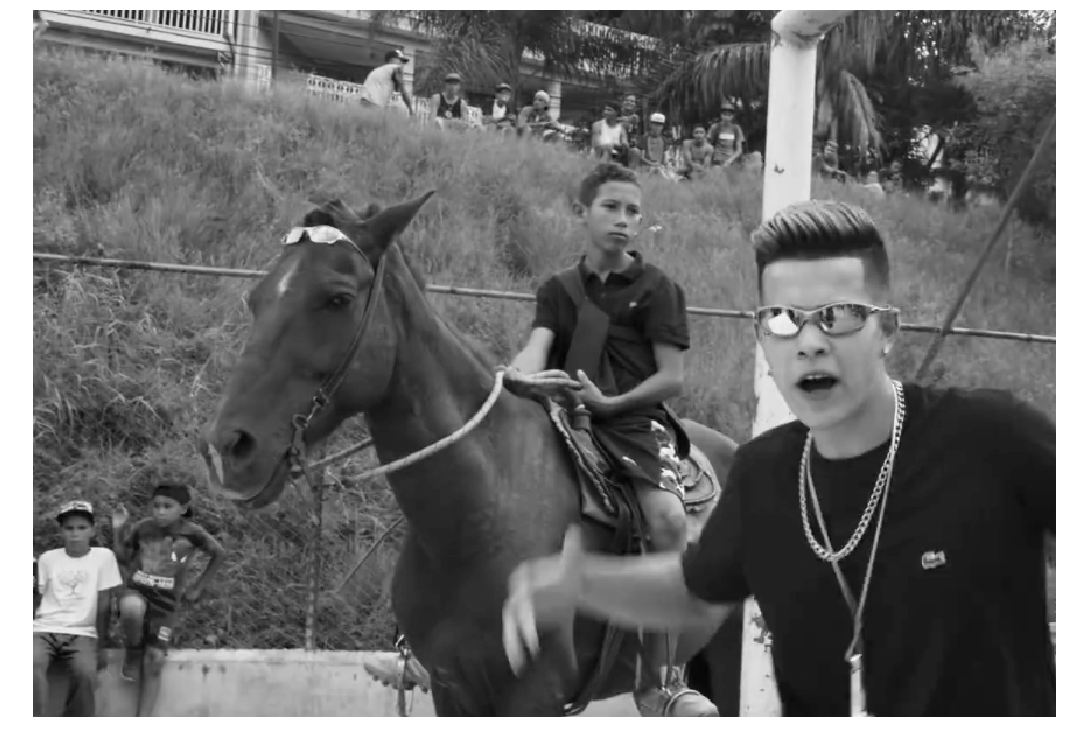

In [27]:
plt.figure(figsize=(20,13)) 
plt.imshow(img, cmap='gray')
plt.axis('off')

## Espaço de frequencias da Imagem Original

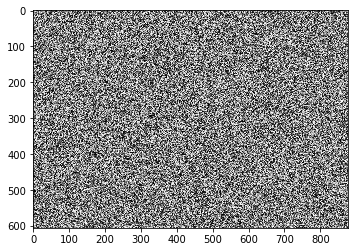

In [28]:
# FFT da imagem original
fimg = np.fft.fftshift(np.fft.fft2(img))
a =np.asarray(abs(fimg),np.uint8)
imshow(np.asarray(abs(fimg),np.uint8),cmap='gray')

In [29]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))


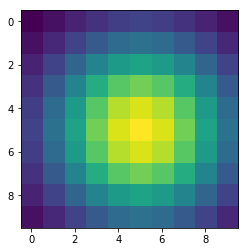

In [30]:
(w,h) = 10,10
mu,sig = 0,3
filtro = np.zeros((w,h))
for i in range(0,w):
    for j in range(0,h):
        x = i-w/2
        y = j-h/2
        bla = np.sqrt(x*x + y*y)
        filtro[i][j] = gaussian(bla,mu,sig)
imshow(filtro)

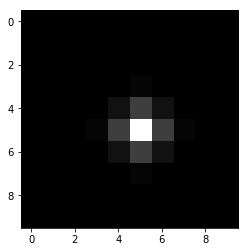

In [31]:
filtro_fft = np.fft.fftshift(np.fft.fft2(filtro))
imshow(np.asarray(abs(filtro_fft),np.uint8),cmap='gray')

In [10]:
final_fft = fimg*filtro_fft

ValueError: operands could not be broadcast together with shapes (606,877) (10,10) 

In [11]:
import scipy.signal


In [23]:
a = scipy.signal.convolve2d(img, filtro)

2460568788.35


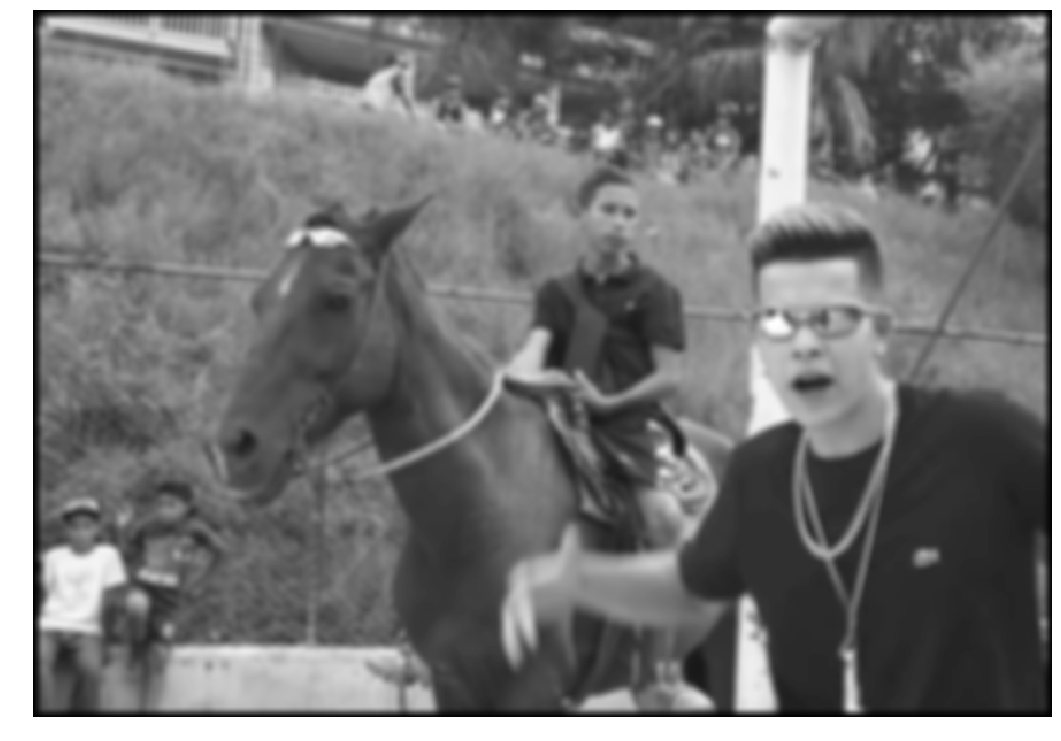

In [24]:
plt.figure(figsize=(20,13)) 
plt.imshow(a, cmap='gray')
plt.axis('off')
print(np.sum(a))

In [220]:
final_img = np.fft.ifft2(final_fft)

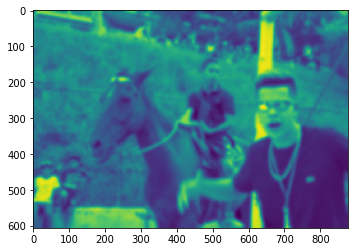

In [144]:
from scipy.ndimage.filters import gaussian_filter
gimg = gaussian_filter(img, 4)
imshow(gimg)

## Mascara utilizada no Espaço de Frequencias

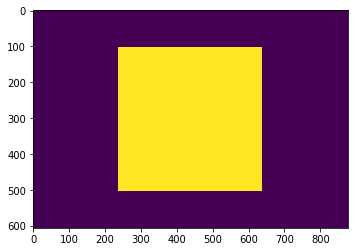

In [136]:
a = np.zeros(fimg.shape)
x = 200
a[int(fimg.shape[0]/2) - x:int(fimg.shape[0]/2) + x,int(fimg.shape[1]/2)- x:int(fimg.shape[1]/2) + x] = 1
b = -(a-1)
imshow(np.asarray(a,np.uint8))

In [ ]:
np.

# Espaço de Frequencias com a mascara aplicada

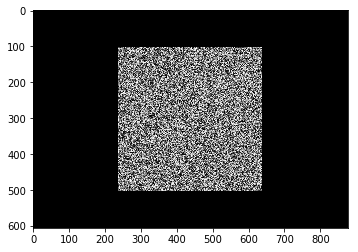

In [137]:
gimg = fimg*a
imshow(np.asarray(abs(gimg),np.uint8),cmap='gray')

## IFFT aplicada no espaço de frequencia com marcara

53291439


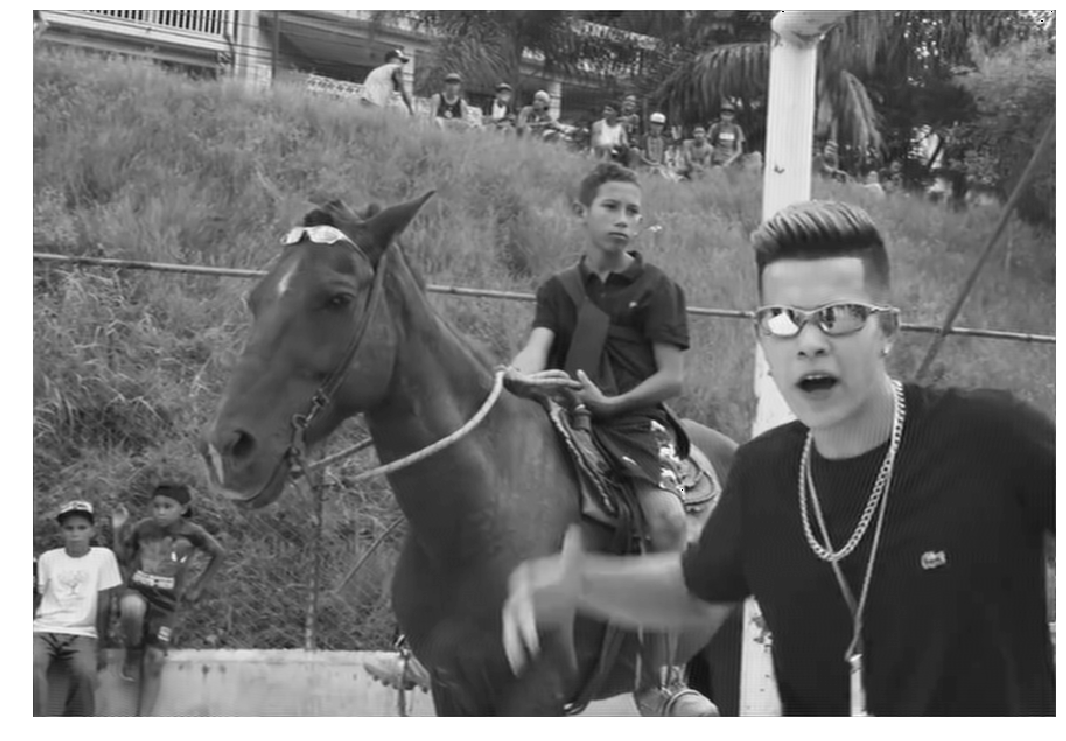

In [130]:
bla = np.fft.ifft2(np.fft.fftshift(gimg))
a =np.asarray(abs(bla),np.uint8)
plt.figure(figsize=(20,13)) 
plt.imshow(a, cmap='gray')
plt.axis('off')
print(np.sum(a))

/Users/kauemoraes/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(53558487+0j)

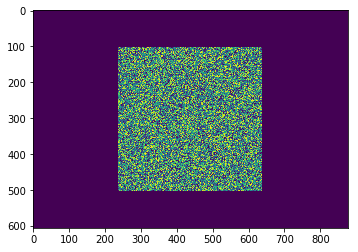

In [138]:
bla = fimg*a
imshow(np.asarray(bla,np.uint8))
np.max(bla)

In [101]:
53558487

In [102]:
q = y + z

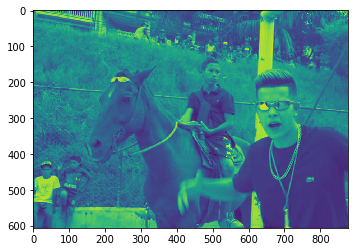

In [103]:
imshow(a)/

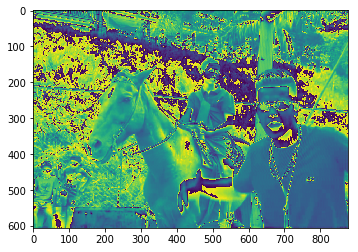

In [104]:
imshow(q)

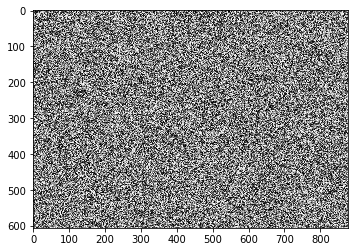

In [105]:
from scipy import ndimage
z= np.asarray(np.fft.fftshift(abs(fimg)),np.uint8)
img_amp_disp = np.log(z + 0.0001)
imshow(z,cmap='gray')

53030107


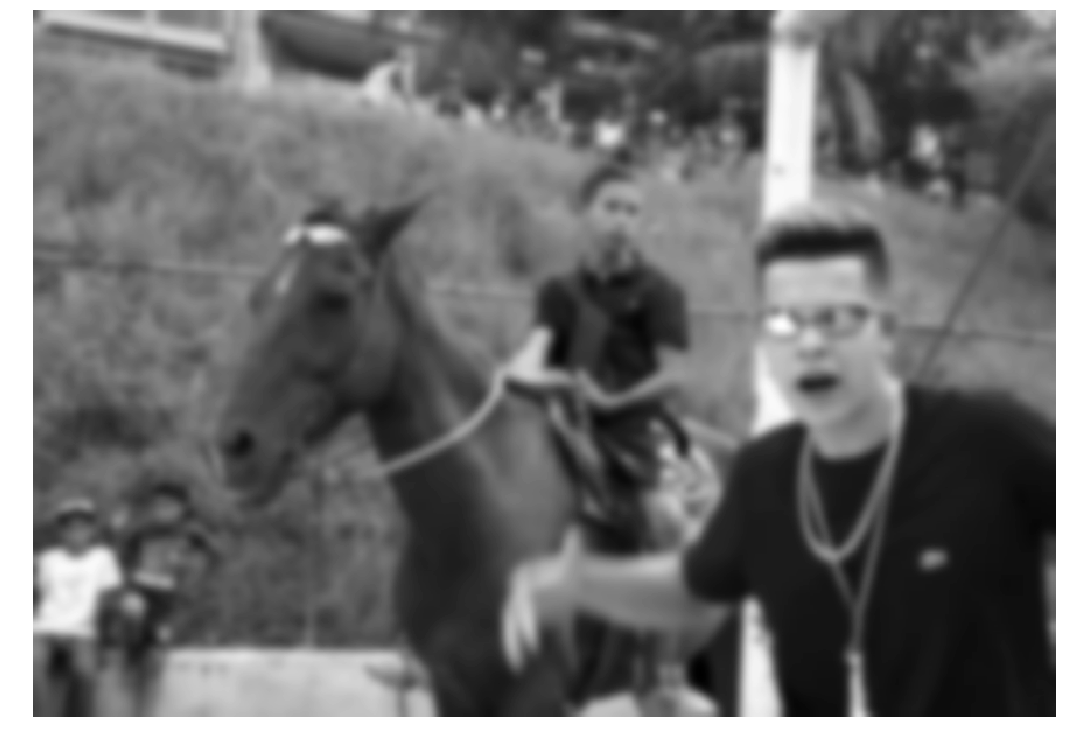

In [272]:
b = ndimage.
plt.figure(figsize=(20,13)) 
plt.imshow(b, cmap='gray')
plt.axis('off')

67643863


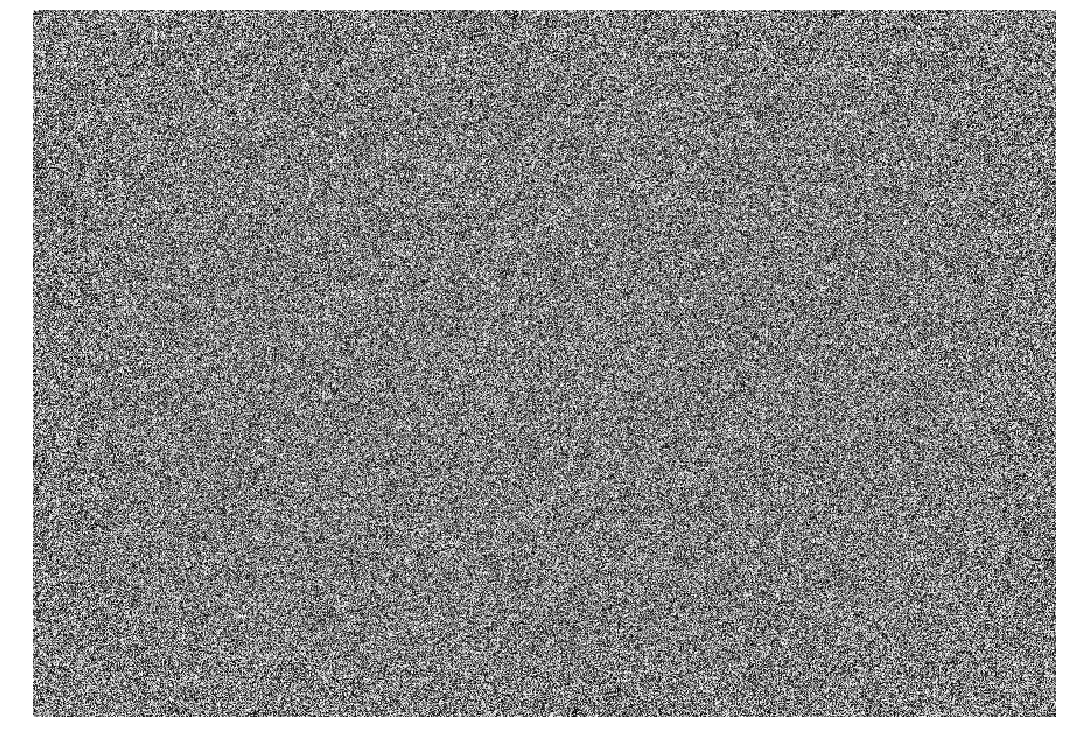

In [273]:
b = np.fft.fft2(b)
b =np.asarray(abs(b),np.uint8)
plt.figure(figsize=(20,13)) 
plt.imshow(b, cmap='gray')
plt.axis('off')
print(np.sum(b))

In [193]:
b = np.fft.ifft2(fimg)

In [249]:
from scipy import fftpack
from scipy import signal


In [247]:
# First a 1-D  Gaussian
t = np.linspace(-100, 100, 10)
bump = np.exp(-0.1*t**2)
bump /= np.trapz(bump) # normalize the integral to 1

# make a 2-D kernel out of it
kernel = bump[:, np.newaxis] * bump[np.newaxis, :]

In [251]:
kernel_ft = fftpack.fft2(kernel, shape=img.shape[:2], axes=(0, 1))


In [250]:
img3 = signal.fftconvolve(img, kernel[:, :, np.newaxis], mode='same')


ValueError: in1 and in2 should have the same dimensionality

In [205]:
a = np.zeros(resp.shape)
a = a + 1
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        if(i+j>resp.shape[1]*1):
            a[i][j] = 0

In [206]:
a

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  0.],
       ..., 
       [ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  0.,  0.,  0.]])

In [345]:
b = resp*a

In [346]:
b.shape

(599, 900)

In [347]:
c = np.fft.ifft2(b)

In [348]:
c = np.asarray(abs(c),dtype=np.uint8)

In [349]:
c

array([[58, 32, 37, ..., 43, 41, 49],
       [21, 16, 15, ..., 11, 10,  9],
       [32, 12, 11, ...,  7,  7, 10],
       ..., 
       [56, 55, 55, ..., 22, 20, 22],
       [41, 41, 44, ..., 21, 21, 17],
       [52, 44, 38, ..., 16, 16, 15]], dtype=uint8)

In [350]:
imageio.imwrite("abc_780.png", c)

In [351]:
np.sum(a) - a.size

-780.0